### IMPORTING LIBRARIES

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array


### MODEL BUILDING

In [4]:

#Load dataset
import pathlib
data_dir = pathlib.Path("C:/Users/PRAMILA/.spyder-py3/ibm/data/datas")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

#Read images from disk into numpy array using opencv
images_dict = {
    'fire': list(data_dir.glob('fire/*')),
    'nofire': list(data_dir.glob('nofire/*'))
}

labels_dict = {
    'fire': 0,
    'nofire': 1
}

#Train test split
X, y = [], []

for _name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(500,500))
        X.append(resized_img)
        y.append(labels_dict[_name])

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)             

model.save('newdata.h5')


115
Epoch 1/15
3/3 [==============================] - 7s 2s/step - loss: 1.5873 - accuracy: 0.4659
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 0.8187 - accuracy: 0.5341
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.6603 - accuracy: 0.6023
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.6507 - accuracy: 0.5568
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 0.6097 - accuracy: 0.6818
Epoch 6/15
3/3 [==============================] - 5s 2s/step - loss: 0.5674 - accuracy: 0.7273
Epoch 7/15
3/3 [==============================] - 5s 1s/step - loss: 0.5382 - accuracy: 0.7386
Epoch 8/15
3/3 [==============================] - 5s 2s/step - loss: 0.5157 - accuracy: 0.7273
Epoch 9/15
3/3 [==============================] - 5s 1s/step - loss: 0.4567 - accuracy: 0.7955
Epoch 10/15
3/3 [==============================] - 5s 1s/step - loss: 0.4189 - accuracy: 0.8068
Epoch 11/15
3/3 [============================

### MAKING PREDICTIONS

--------------nofire---------------


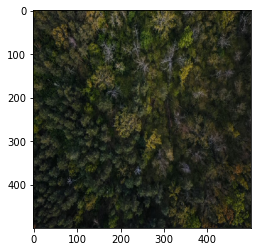

In [18]:
model = tf.keras.models.load_model('C:/Users/PRAMILA/.spyder-py3/ibm/newdata.h5')
img = load_img(r"C:/Users/PRAMILA/.spyder-py3/ibm/data/datas/nofire/3.jpg", target_size=(500,500)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))    
if max_index_col==1:
    print("--------------nofire---------------")
elif max_index_col == 0:
    print("--------------fire------------------")

--------------fire------------------


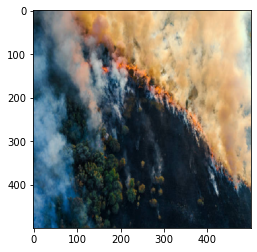

In [17]:
img = load_img(r"C:/Users/PRAMILA/.spyder-py3/ibm/data/datas/fire/3.jpg", target_size=(500,500)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)
# Generate feature output by predicting on the input image
val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))    
if max_index_col==1:
    print("--------------nofire---------------")
elif max_index_col == 0:
    print("--------------fire------------------")

### FEATURE MAPPING OF IMAGES

[<KerasTensor: shape=(None, 500, 500, 16) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 166, 166, 16) dtype=float32 (created by layer 'max_pooling2d')>, <KerasTensor: shape=(None, 166, 166, 32) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 55, 55, 32) dtype=float32 (created by layer 'max_pooling2d_1')>, <KerasTensor: shape=(None, 55, 55, 64) dtype=float32 (created by layer 'conv2d_2')>, <KerasTensor: shape=(None, 18, 18, 64) dtype=float32 (created by layer 'max_pooling2d_2')>]
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 166, 166, 16)   

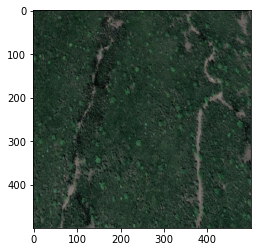

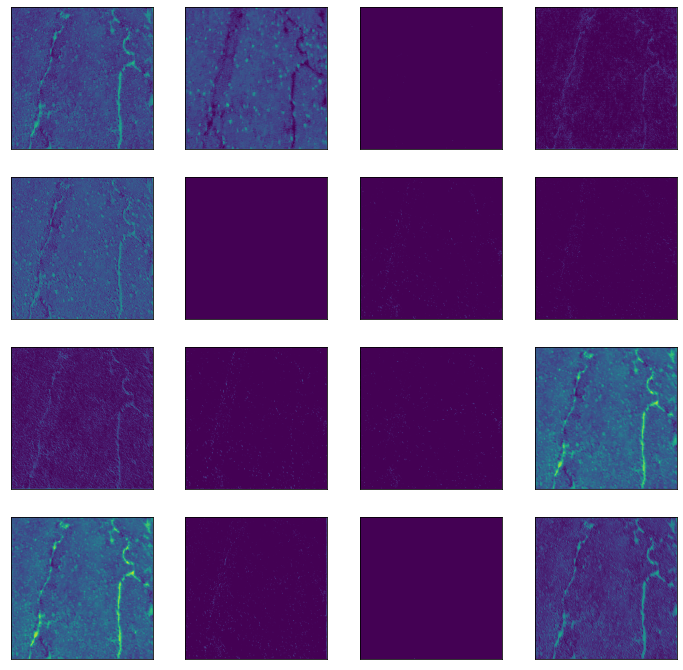

End layer
LAYER: 1


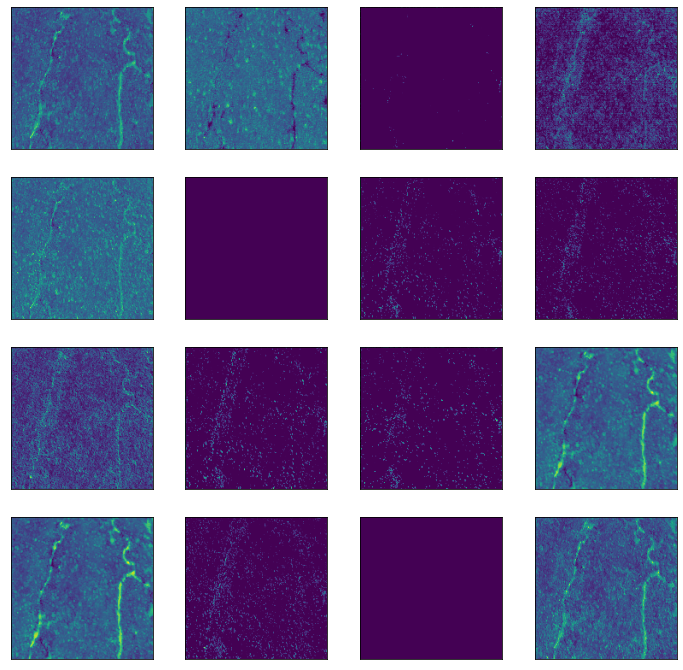

End layer
LAYER: 2


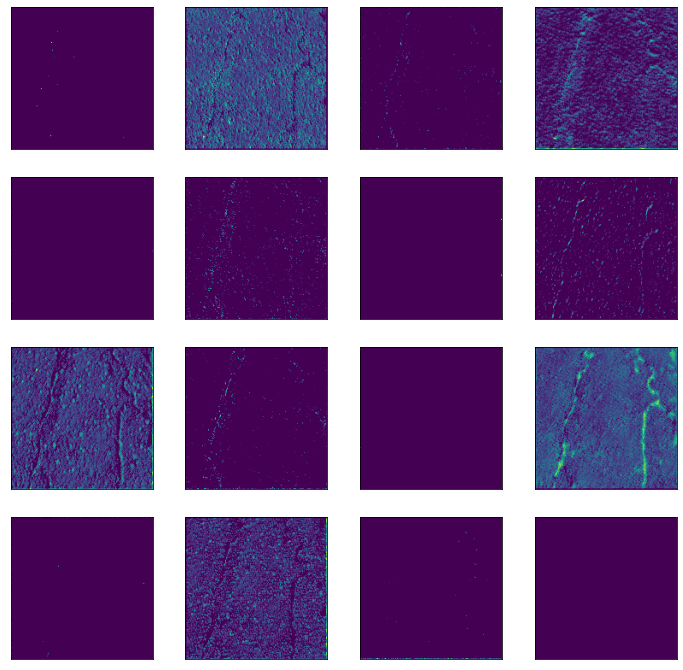

End layer
LAYER: 3


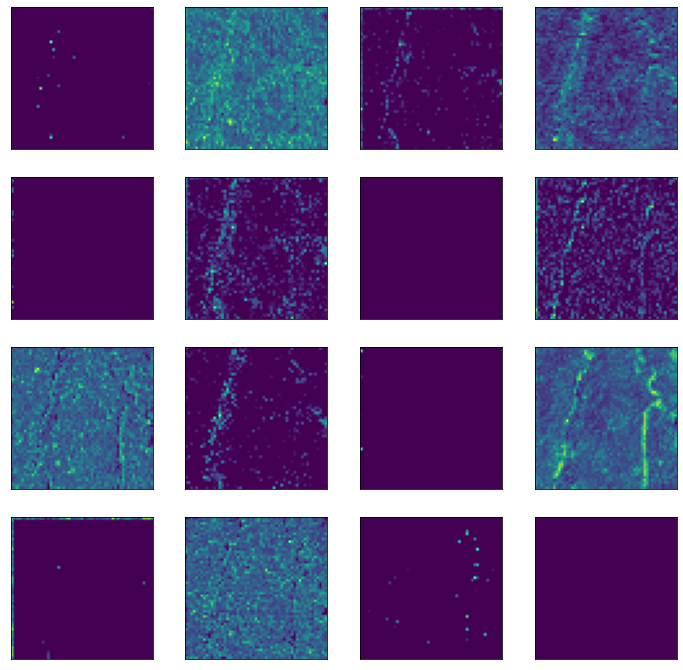

End layer
LAYER: 4


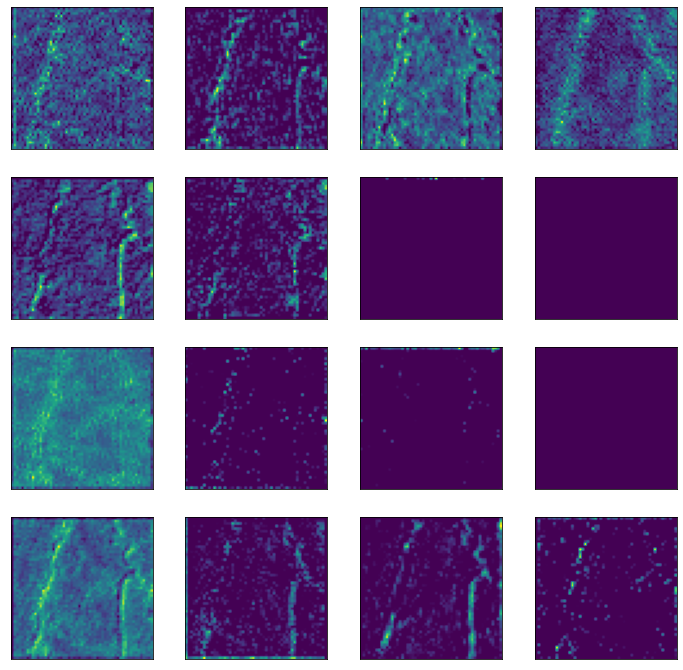

End layer
LAYER: 5


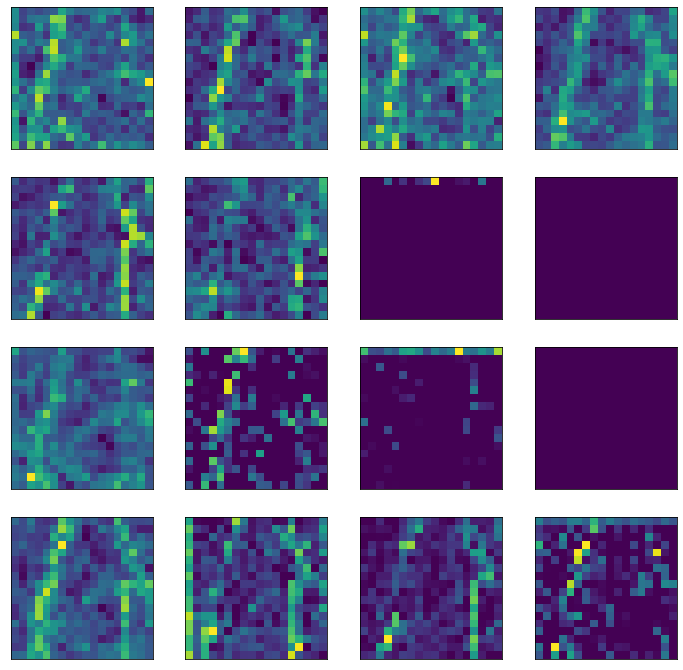

End layer


In [15]:
from keras.models import Model
conv_layer_index = [0,1,2,3,4,5]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
print(outputs)
model_short = Model(inputs=model.inputs, outputs=outputs)
print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from keras.preprocessing.image import load_img, img_to_array
img = load_img(r"C:/Users/PRAMILA/.spyder-py3/ibm/data/datas/nofire/sunderbans2.jpg", target_size=(500,500)) #VGG user 224 as input
plt.imshow(img)
# convert the image to an array
img = img_to_array(img)
# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

val = model.predict(img)
#print(val)
max_index_col = int(np.argmax(val, axis=1))    
if max_index_col==1:
    print("------------------nofire---------------------")
elif max_index_col == 0:
    print("------------------fire-----------------------")
    
# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)
# Generate feature output by predicting on the input image
pos = 0
columns = 4
rows = 4
for ftr in feature_output:
    #pos = 1
    print("LAYER: "+str(pos))
    fig=plt.figure(figsize=(12, 12))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1],  cmap='viridis' )
        
    plt.show()
    pos += 1
    print("End layer")